In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
# Detect observations with more than one outlier
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [5]:
features = df.columns[:-1].tolist()
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [6]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


In [7]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [8]:
X.shape

(200, 9)

In [9]:
y.shape

(200,)

In [10]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

## SVM - StandardScaler

In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [13]:
X_sc

array([[ 1.21769482,  0.32505721,  1.23450049, ..., -0.14550936,
        -0.34158999, -0.59385208],
       [-0.24185619,  0.68743982,  0.58366648, ..., -1.03588923,
        -0.34158999, -0.59385208],
       [-0.85572617,  0.16560886,  0.54710277, ..., -1.08427944,
        -0.34158999, -0.59385208],
       ...,
       [ 1.06315412,  1.36871914, -2.04892053, ..., -0.44552867,
         4.18900112, -0.59385208],
       [-0.71406386,  1.39770975, -2.04892053, ..., -0.4068165 ,
         3.99562223, -0.59385208],
       [-0.45649604,  1.18028018, -2.04892053, ..., -0.27132391,
         4.27187779, -0.59385208]])

In [19]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((150, 9), (150,), (50, 9), (50,))

In [ ]:
# clf = RandomForestClassifier()
# clf.fit(X_sc_train, y_train)
# predict=clf.predict(X_sc_test)

In [ ]:
print(confusion_matrix(y_test, predict))
print(accuracy_score(y_test, predict))

## SVM Classifier - StandardScaler with GridSearchCV

In [20]:
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]} 

clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
                
clf_grid.fit(X_sc_train, y_train)

print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters:
 {'C': 1.2, 'gamma': 0.1}
Best Estimators:
 SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.7s finished


In [21]:
model = svm.SVC(kernel='rbf', C = 1.2, gamma=0.1)
model.fit(X_sc_train, y_train)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred = model.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[15  3  0  0  0  0]
 [ 4 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  5]]
0.72


___
## SVM Classifier - with GridSearchCV

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 9), (150,), (50, 9), (50,))

In [25]:
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]} 

clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
                
clf_grid.fit(X_train, y_train)

print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters:
 {'C': 1.2, 'gamma': 0.1}
Best Estimators:
 SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.9s finished


In [26]:
model = svm.SVC(kernel='rbf', C = 1.2, gamma=0.1)
model.fit(X_train, y_train)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[15  3  0  0  0  0]
 [ 4 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  5]]
0.72


# Method2 

In [5]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Type", axis = 1)
y = df["Type"]

sc = StandardScaler()
sc.fit(X)

X_scaled = sc.transform(X)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_scaled, columns=X.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm_model.fit(X_train, y_train)
sv_train_score=svm_model.score(X_train, y_train)
sv_test_score=svm_model.score(X_test, y_test)
print('The accuracy of the svm classifier on training data is {:.2f} '.format(sv_train_score))
print('The accuracy of the svm classifier on test data is {:.2f}'.format(sv_test_score))

The accuracy of the svm classifier on training data is 0.77 
The accuracy of the svm classifier on test data is 0.72


In [8]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[11  0  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  1  1  0]
 [ 0  1  0  0  0  7]]
0.7209302325581395


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.62      0.71      0.67        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      0.33      0.50         3
           7       1.00      0.88      0.93         8

   micro avg       0.72      0.72      0.72        43
   macro avg       0.66      0.57      0.58        43
weighted avg       0.70      0.72      0.69        43



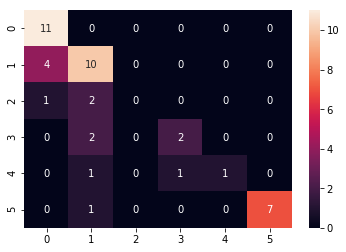

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")